# Tsunamis from year 1800 to 2021



In [1]:
!pip install folium

In [2]:
!pip install pandas

![title](unnamed.png)

## About Tsunamis
Tsunamis are caused by earthquakes, volcanic eruptions, or landslides in seas and oceans. Such movements can transport vast amounts of water, creating huge waves. A tsunami is usually a series of waves, although frequently, the first wave is not the most destructive. Their destruction power is enormous, also illustrated by the fact that they can reach a width of up to 100 kilometres, a height of up to 30 meters, and a speed of up to 800 kilometres per hour (in the deep ocean). 

## Load Data

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [2]:
tsunamis = pd.read_csv('data/tsunami_1800to2021.csv', delimiter=",", encoding='utf-8')


I have added column 'Earthquake Mayor/Great'where 1 ('yes') represents Earthquakes above 7.0 magnitude in the Richter scale. These are Earthquakes which cause serious or severe destruction and loss of life over large areas.

In [4]:
tsunamis['Earthquake Mayor/Great']=0

In [5]:
tsunamis.loc[tsunamis['Earthquake Magnitude']>7,'Earthquake Mayor/Great'] = 1
tsunamis

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged,Earthquake Mayor/Great
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,0.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2021.0,8.0,11.0,17.0,46.0,14.0,4.0,1.0,7.1,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2158,2021.0,8.0,12.0,18.0,35.0,20.0,4.0,1.0,8.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2159,2021.0,8.0,14.0,12.0,29.0,8.0,4.0,1.0,7.2,0.0,...,NaN,2248.0,329.0,3.0,12763.0,NaN,4.0,53815.0,83770.0,1
2160,2021.0,9.0,8.0,1.0,47.0,47.0,4.0,1.0,7.0,0.0,...,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,7317.0,0


## Size, Columns & data Types

In [6]:

tsunamis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2161 non-null   float64
 1   Mo                         2112 non-null   float64
 2   Dy                         2054 non-null   float64
 3   Hr                         1338 non-null   float64
 4   Mn                         1289 non-null   float64
 5   Sec                        941 non-null    float64
 6   Tsunami Event Validity     2161 non-null   float64
 7   Tsunami Cause Code         2158 non-null   float64
 8   Earthquake Magnitude       1293 non-null   float64
 9   Deposits                   2161 non-null   float64
 10  Country                    2161 non-null   object 
 11  Location Name              2159 non-null   object 
 12  Latitude                   1892 non-null   float64
 13  Longitude                  1892 non-null   float

In [7]:
tsunamis.loc[:20000,[ 'Country','Location Name','Year', 'Earthquake Magnitude','Total Deaths','Total Missing','Total Injuries']]

,Country,Location Name,Year,Earthquake Magnitude,Total Deaths,Total Missing,Total Injuries
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PORTUGAL,AZORES,1800.0,NaN,NaN,NaN,NaN
2,CROATIA,BAKAR,1802.0,NaN,NaN,NaN,NaN
3,ANTIGUA AND BARBUDA,ANTIGUA ISLAND & ST. CHRISTOPHER,1802.0,NaN,NaN,NaN,NaN
4,UK,SW ENGLAND,1802.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2157,PHILIPPINES,"MINDANAO ISLAND, PHILIPPINES",2021.0,7.1,1.0,NaN,NaN
2158,UK TERRITORY,SOUTHERN ATLANTIC OCEAN,2021.0,8.1,NaN,NaN,NaN
2159,HAITI,PORT-AU-PRINCE,2021.0,7.2,2248.0,329.0,12763.0
2160,MEXICO,S. MEXICO,2021.0,7.0,3.0,NaN,NaN


## Total Damage

In [8]:
tsunamis['Total Damage ($Mil)'].describe()

count       143.000000
mean       4197.016455
std       21700.862491
min           0.003000
25%           2.412500
50%          39.000000
75%         520.000000
max      220136.600000
Name: Total Damage ($Mil), dtype: float64

##  Tsunamis by Year & Month

*It seems there are more Tsunamis happening recently and they mostly happen during the winter:*

<AxesSubplot:xlabel='Year', ylabel='Count'>

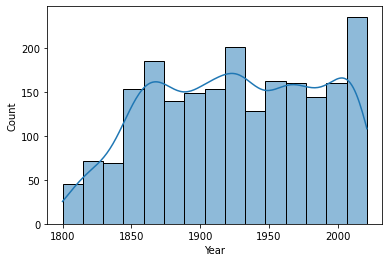

In [9]:
sns.histplot(data=tsunamis, x="Year",kde=True)


So far there have been 294 Tsunamis this century...;(

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

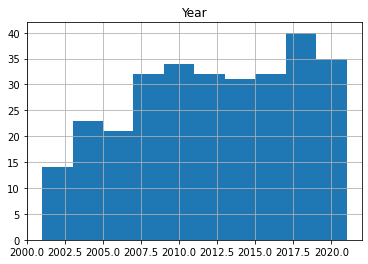

In [10]:
this_century = (tsunamis['Year']>2000)
temp3=tsunamis[this_century]
temp3[['Year','Country']].hist()

In [11]:

temp3[['Year']].value_counts().sort_index(ascending = False)

Year  
2021.0    13
2020.0    14
2019.0     8
2018.0    20
2017.0    20
2016.0    15
2015.0    17
2014.0    18
2013.0    13
2012.0    15
2011.0    17
2010.0    18
2009.0    16
2008.0    12
2007.0    20
2006.0    13
2005.0     8
2004.0    11
2003.0    12
2002.0    10
2001.0     4
dtype: int64

<AxesSubplot:>

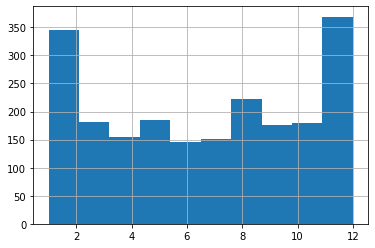

In [12]:
tsunamis['Mo'].hist()


## Total Deaths ##

*For practical reasons I wil concentrate in data with less than 10,000 deaths which is where the mayority of data falls into. This also exclude NaN data*

In [13]:
less_than_10K_deaths = (tsunamis['Total Deaths']<10000)
temp=tsunamis[less_than_10K_deaths]

<AxesSubplot:xlabel='Year'>

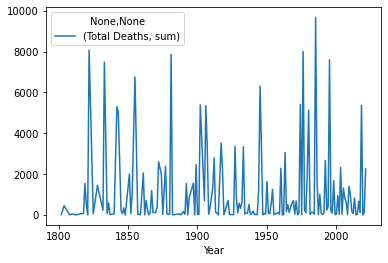

In [14]:

Deaths_by_Year=temp.groupby(['Year']).agg({'Total Deaths':['sum']})
Deaths_by_Year.plot()

**Categorization of tsunamis depending on Total Deaths** 

I have categorized Tsunamis depending on the Total Deaths, in the following ranges: 
* *Mild* = les that 5 deaths
* *Medium* = between 5 and 100 deaths
* *Severe* = above 100 deaths

In [15]:
tsunamis['Total Deaths'].isna().value_counts()

True     1670
False     492
Name: Total Deaths, dtype: int64

In [16]:
severe = (tsunamis['Total Deaths']>100) 
medium = (tsunamis['Total Deaths'].between(5,100))
mild = (tsunamis['Total Deaths']<5)
tsunamis[severe]

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged,Earthquake Mayor/Great
12,1804.0,7.0,10.0,13.0,NaN,NaN,4.0,1.0,7.3,0.0,...,1.0,450.0,NaN,NaN,NaN,NaN,4.0,10810.0,300.0,1
38,1812.0,3.0,26.0,20.0,7.0,NaN,2.0,1.0,7.7,0.0,...,NaN,26000.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1
46,1815.0,4.0,10.0,NaN,NaN,NaN,4.0,6.0,NaN,1.0,...,1.5,60000.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0
48,1815.0,11.0,22.0,NaN,NaN,NaN,3.0,3.0,7.0,0.0,...,1.5,11453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
64,1819.0,6.0,16.0,NaN,NaN,NaN,3.0,1.0,7.7,0.0,...,NaN,1543.0,NaN,NaN,NaN,NaN,4.0,1547.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2018.0,8.0,5.0,11.0,47.0,3.0,4.0,1.0,6.9,0.0,...,NaN,560.0,NaN,NaN,7733.0,509.0,4.0,NaN,83392.0,0
2121,2018.0,9.0,28.0,10.0,2.0,25.0,4.0,3.0,7.5,1.0,...,NaN,4340.0,667.0,3.0,10679.0,1500.0,4.0,3673.0,39191.0,1
2126,2018.0,12.0,22.0,13.0,55.0,NaN,4.0,7.0,NaN,2.0,...,NaN,437.0,10.0,1.0,31943.0,250.0,4.0,NaN,2844.0,0
2146,2020.0,10.0,30.0,11.0,51.0,27.0,4.0,1.0,7.0,0.0,...,NaN,118.0,NaN,NaN,1054.0,400.0,4.0,NaN,NaN,0


In [17]:
severe.value_counts()



False    2004
True      158
Name: Total Deaths, dtype: int64

In [18]:
medium.value_counts()

False    1958
True      204
Name: Total Deaths, dtype: int64

In [19]:

mild.value_counts()

False    2032
True      130
Name: Total Deaths, dtype: int64

Text(0.5, 1.0, 'Tsunamis Severity')

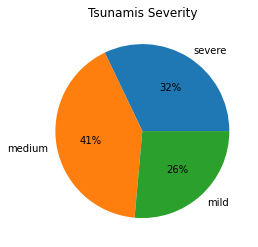

In [20]:
Range=['severe','medium','mild']
Range_values=[158,204,130]
fig, ax = plt.subplots()
ax.pie(Range_values,labels=Range, autopct='%1.0f%%')
ax.set_title('Tsunamis Severity')


## Tsunami Intensity ##

Tsunami Intensity is The measure of strength, force, or energy. 
In this data, Intensity (I) is calculated according to the formula:

I= 1/2+ Log2 Hav where Hav is the water hight. For example:

* I = 4 for 11 meters
* I = 5 for 22.5 meters

The new scales Papadopoulus and Imamura includes 12 categories according to the effects on humans, on nature and objects, including vessels of variable size, and on buildings and other engineered constructions:

<AxesSubplot:>

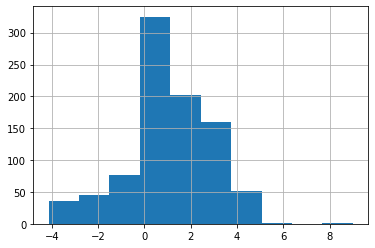

In [21]:

Tsunami_Intensity = tsunamis[~tsunamis['Tsunami Intensity'].isnull()]
Tsunami_Intensity['Tsunami Intensity'].describe()
tsunamis['Tsunami Intensity'].hist()

## Maximum Water High (in meters) ##

The mayority of Tsunamis have a maximum water high between 0 and 10 meters, however the highest water level ever recorded was 500 m in Indonesia

In [22]:
Water_High_below10 = (tsunamis['Maximum Water Height (m)']<10)
temp=tsunamis[Water_High_below10]

<AxesSubplot:>

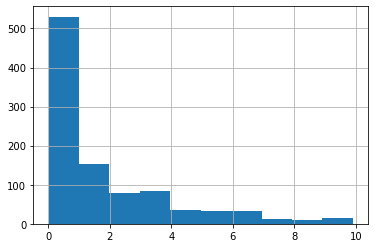

In [23]:
temp['Maximum Water Height (m)'].hist()

In [24]:
Water_High_above200 = (tsunamis['Maximum Water Height (m)']>200)
temp=tsunamis[Water_High_above200]
temp[['Country', 'Year', 'Maximum Water Height (m)']]

,Country,Year,Maximum Water Height (m)
1132,INDONESIA,1930.0,500.0
1410,USA,1958.0,524.6
1467,ITALY,1963.0,235.0
1663,USA,1980.0,250.0


## Earthquake Magnitud ##

The most destructive tsunamis are generated from large, shallow earthquakes with an epicenter or fault line near or on the ocean floor. Usually, it takes an earthquake with a Richter magnitude exceeding 7.5 to produce a destructive tsunami.
For this example I have grouped Earthquake Maginute.

<AxesSubplot:xlabel='Earthquake Magnitude', ylabel='Count'>

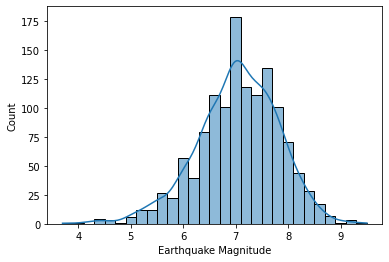

In [25]:
sns.histplot(data=tsunamis, x="Earthquake Magnitude",kde=True)

In [26]:
Magnitud_below5 = tsunamis[(tsunamis['Earthquake Magnitude']<4.9)].agg({'Maximum Water Height (m)':['mean']}) 
Magnitud_5to6 = tsunamis[(tsunamis['Earthquake Magnitude'].between(5,5.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_6to7 = tsunamis[(tsunamis['Earthquake Magnitude'].between(6,6.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_7to8 = tsunamis[(tsunamis['Earthquake Magnitude'].between(7,7.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_8to9 = tsunamis[(tsunamis['Earthquake Magnitude'].between(8,8.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_above9 = tsunamis[(tsunamis['Earthquake Magnitude']>9)].agg({'Maximum Water Height (m)':['mean']})
Magnitud_above9


,Maximum Water Height (m)
mean,41.74


In [27]:
y=[1.67,0.9005,1.332688,3.683524,8.138469,41.74]
x=['Magnitud_below5','Magnitud_5to6','Magnitud_6to7','Magnitud_7to8','Magnitud_8to9','Magnitud_above9']


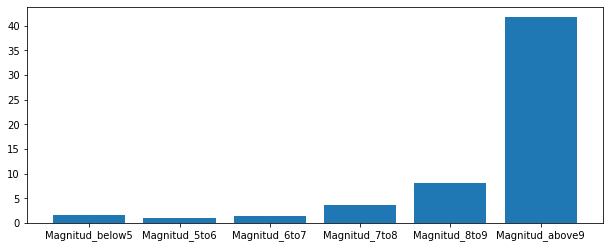

In [28]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()


array([[<AxesSubplot:title={'center':"('Total Deaths', 'sum')"}>]],
      dtype=object)

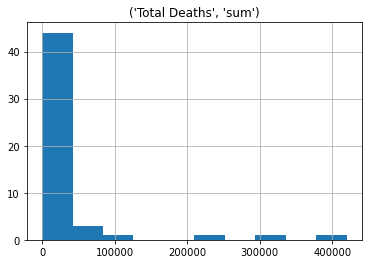

In [29]:
Magnitud=tsunamis.groupby(['Earthquake Magnitude']).agg({'Total Deaths':['sum']})
Magnitud.hist()

## Tsunamis by Country ##

Countries with the highest death toll by Tsunamis are  Haiti, Indonesia  and Japan.
Haiti catastrophic magnitude 7.0 Mw earthquake struck Haiti at 16:53 local time on Tuesday, 12 January 2010 and left a devasting death toll of 316,000.

<AxesSubplot:ylabel='sum'>

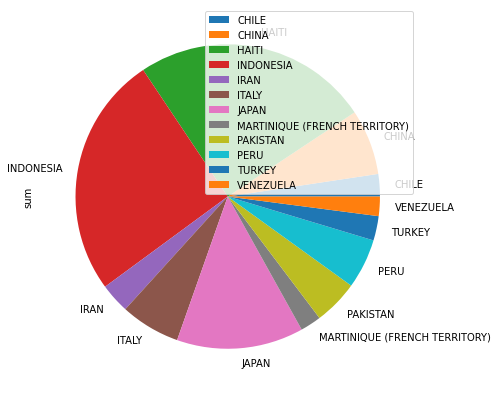

In [30]:
Deaths_by_Countries = (tsunamis['Total Deaths']>25000)
temp=tsunamis[Deaths_by_Countries]

ctry=temp.groupby(['Country']).agg({'Total Deaths':['sum']}).plot(kind='pie', y='Total Deaths',figsize=(7, 7))

ctry

In [31]:
Deaths_by_Countries = (tsunamis['Total Deaths']>25000)
temp = tsunamis[Deaths_by_Countries]
temp[['Country','Year','Total Deaths']].sort_values(by='Total Deaths', ascending=False)


,Country,Year,Total Deaths
1978,HAITI,2010.0,316000.0
1904,INDONESIA,2004.0,227899.0
1034,JAPAN,1923.0,142807.0
1950,CHINA,2008.0,87652.0
884,ITALY,1908.0,80000.0
1554,PERU,1970.0,66794.0
46,INDONESIA,1815.0,60000.0
1191,PAKISTAN,1935.0,60000.0
1753,IRAN,1990.0,40000.0
619,INDONESIA,1883.0,36417.0


Text(0.5, 1.0, 'Total Deaths by Countries with the highest death toll')

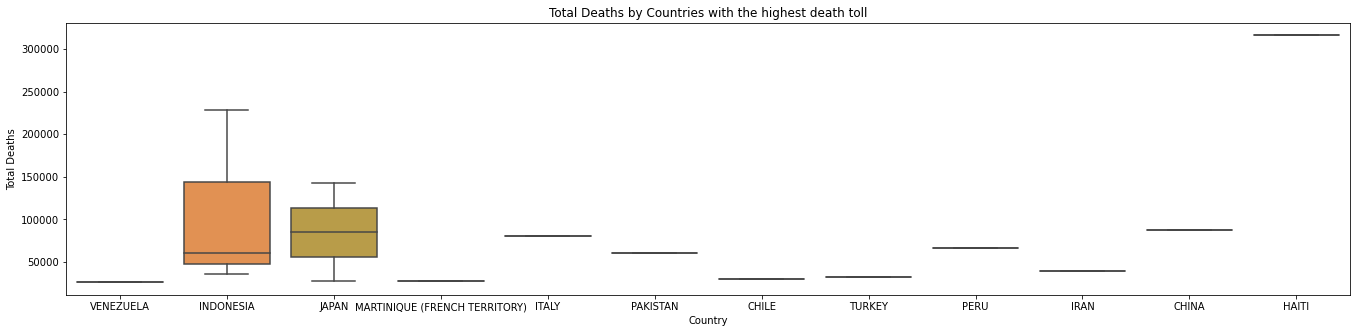

In [32]:
plt.figure(figsize=(23, 5))
sns.boxplot(x = "Country", y='Total Deaths', data = temp)
plt.title("Total Deaths by Countries with the highest death toll")

## Deaths by Year ##

The most lethal years were 2010 (Haiti), 2004 (Indonesia), 1923 (Japan) & 2008 (China)

<AxesSubplot:ylabel='sum'>

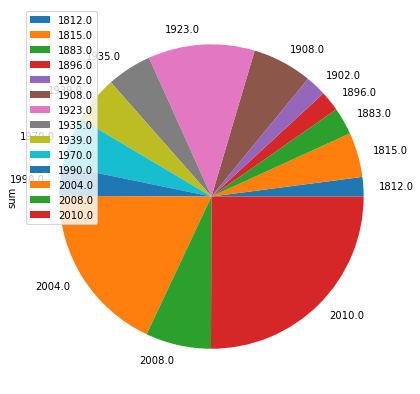

In [33]:
Deaths_by_Year = (tsunamis['Total Deaths']>25000)
temp=tsunamis[Deaths_by_Year]

yr=temp.groupby(['Year']).agg({'Total Deaths':['sum']}).plot(kind='pie', y='Total Deaths',figsize=(7, 7))
yr

<AxesSubplot:xlabel='Maximum Water Height (m)', ylabel='Count'>

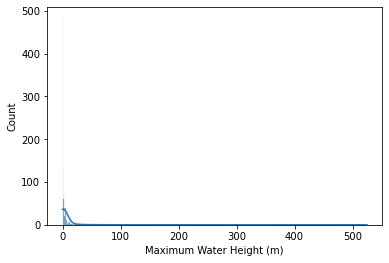

In [34]:
sns.histplot(data=tsunamis, x="Maximum Water Height (m)",kde=True)

## Locations ##

In [35]:
tsunamis[['Latitude', 'Longitude', 'Total Deaths']].describe()

,Latitude,Longitude,Total Deaths
count,1892.000000,1892.000000,492.000000
mean,13.685687,37.707962,3271.034553
std,28.811748,110.683437,20341.118896
min,-63.000000,-179.971000,1.000000
25%,-8.305000,-71.500000,4.000000
50%,16.000000,50.674500,24.500000
75%,38.391500,140.334750,262.750000
max,71.813000,179.984000,316000.000000


In [36]:
temp = tsunamis[['Latitude','Longitude','Total Deaths']]
temp = temp.dropna()

my_zip = zip(temp['Latitude'], temp['Longitude'],temp['Total Deaths'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(37.7, 138.3, 19.0),
 (39.05, 139.95, 450.0),
 (44.833, 7.25, 2.0),
 (39.9, 139.9, 57.0),
 (10.6, -66.9, 26000.0),
 (34.2, -119.9, 1.0),
 (-8.2, 118.0, 60000.0),
 (-8.0, 115.0, 11453.0),
 (37.6, 15.133, 72.0),
 (23.0, 71.0, 1543.0),
 (37.75, 21.25, 8.0),
 (-7.0, 119.0, 500.0),
 (-15.95, -5.7, 3.0),
 (36.0, 36.0, 8000.0),
 (-33.0, -72.0, 72.0)]

In [37]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[39.728593,8.952292], 
                         zoom_start=1.5, blur=0,
                         tiles="OpenStreetMap")


In [38]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=1,
                              radius = 10,
                              blur = 10))

## Correlations ##

In [39]:
tsunamis[['Earthquake Magnitude','Tsunami Intensity','Total Deaths','Maximum Water Height (m)','Tsunami Magnitude (Iida)','Total Missing','Total Injuries','Total Damage ($Mil)','Total Houses Destroyed','Total Houses Damaged','Earthquake Mayor/Great']].corr()

,Earthquake Magnitude,Tsunami Intensity,Total Deaths,Maximum Water Height (m),Tsunami Magnitude (Iida),Total Missing,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged,Earthquake Mayor/Great
Earthquake Magnitude,1.000000,0.164317,0.106148,0.142619,0.377296,0.120641,0.065445,0.154152,0.088886,0.389748,0.777869
Tsunami Intensity,0.164317,1.000000,0.149765,0.254667,0.876318,0.486530,0.115912,-0.393702,0.074430,-0.031075,0.012606
Total Deaths,0.106148,0.149765,1.000000,0.031011,0.128100,0.999839,0.769643,0.106251,0.299189,0.270261,0.035511
Maximum Water Height (m),0.142619,0.254667,0.031011,1.000000,0.302138,-0.085121,0.021245,0.034028,0.047185,0.247039,-0.017930
Tsunami Magnitude (Iida),0.377296,0.876318,0.128100,0.302138,1.000000,-0.155133,0.019523,-0.296394,0.081605,-0.022351,0.143069
Total Missing,0.120641,0.486530,0.999839,-0.085121,-0.155133,1.000000,0.788468,-0.236856,0.997508,0.786731,0.189080
Total Injuries,0.065445,0.115912,0.769643,0.021245,0.019523,0.788468,1.000000,0.267049,0.761761,0.285936,0.041342
Total Damage ($Mil),0.154152,-0.393702,0.106251,0.034028,-0.296394,-0.236856,0.267049,1.000000,0.332118,0.468655,0.016019
Total Houses Destroyed,0.088886,0.074430,0.299189,0.047185,0.081605,0.997508,0.761761,0.332118,1.000000,0.895153,0.078974
Total Houses Damaged,0.389748,-0.031075,0.270261,0.247039,-0.022351,0.786731,0.285936,0.468655,0.895153,1.000000,0.125294


## Clasification

In [40]:
temp2 = tsunamis.dropna(subset=['Tsunami Magnitude (Iida)','Total Deaths','Earthquake Magnitude'])

In [41]:
y=temp2['Earthquake Mayor/Great']
x=temp2[['Tsunami Magnitude (Iida)','Total Deaths','Earthquake Magnitude']]

In [42]:
#split the data in order to test it (in this case train it in 60% and test it on 40%):

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [43]:
X_train

,Tsunami Magnitude (Iida),Total Deaths,Earthquake Magnitude
1720,-3.3,2.0,6.7
844,1.0,1000.0,8.8
1462,-2.3,15.0,7.3
926,1.6,63.0,7.1
72,4.0,500.0,7.5
...,...,...,...
431,2.0,580.0,7.0
1371,1.0,7.0,6.4
1479,2.7,26.0,7.5
1080,0.4,3022.0,7.6


In [44]:
losses = {}

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

C:\Users\imypo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr.predict_proba(X_test)[:,1]

array([0.98861562, 0.2449278 , 0.88550057, 0.1293438 , 0.99448408,
       0.53116939, 0.7573808 , 0.99985811, 0.96543297, 0.9968396 ,
       0.82481342, 0.99956264, 0.8985961 , 0.34029788, 0.99009487,
       0.85502556, 0.21397783, 0.94950248, 0.96981747, 0.41965057,
       0.94513922, 0.92314653, 0.70992997, 0.78184607, 0.93650204,
       0.9829899 , 0.95983355, 0.54005548, 0.9060874 , 0.28299923,
       0.91352119, 0.14953938, 0.09732118, 0.98925094, 0.99787622,
       0.47020679, 0.98384186, 0.40935339, 0.69110285, 0.43645057,
       0.71804727, 0.82529252, 0.47019099, 0.98313696, 0.96925009,
       0.99743484, 0.99201767, 0.73373397, 0.69107577, 0.47836295,
       0.91741489, 0.99133977, 0.16348707, 0.99328234, 0.43136306,
       0.99701302, 0.05699215, 0.94808273, 0.99658032, 0.6979887 ,
       0.96659585, 0.99907469, 0.68708401, 0.54949995, 0.86984471,
       0.54553655, 0.63479268, 0.97841611, 0.97448709, 0.98470703,
       0.05535435, 0.47091784, 0.98336533, 0.86572802, 0.88606

In [48]:
lr.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
y_test

1796    1
1091    0
1230    1
1783    0
544     1
       ..
862     1
1026    1
429     1
509     1
326     0
Name: Earthquake Mayor/Great, Length: 77, dtype: int64

In [50]:
test_result = pd.DataFrame({'predicted_brob': lr.predict_proba(X_test)[:,1],'actual':y_test,'predicted':lr.predict(X_test)})
test_result

,predicted_brob,actual,predicted
1796,0.988616,1,1
1091,0.244928,0,0
1230,0.885501,1,1
1783,0.129344,0,0
544,0.994484,1,1
...,...,...,...
862,0.983365,1,1
1026,0.865728,1,1
429,0.886067,1,1
509,0.828922,1,1


In [51]:
test_result['correctly predicted']=(test_result['actual']==test_result['predicted'])
test_result

,predicted_brob,actual,predicted,correctly predicted
1796,0.988616,1,1,True
1091,0.244928,0,0,True
1230,0.885501,1,1,True
1783,0.129344,0,0,True
544,0.994484,1,1,True
...,...,...,...,...
862,0.983365,1,1,True
1026,0.865728,1,1,True
429,0.886067,1,1,True
509,0.828922,1,1,True


In [52]:
test_result['correctly predicted'].value_counts(normalize=True)

True     0.948052
False    0.051948
Name: correctly predicted, dtype: float64

**Accuracy Score**

Accuracy Score: accuracy of my predictions is 98.7%

In [53]:
from sklearn.metrics import accuracy_score
losses['Logistic'] = accuracy_score(y_test, lr.predict(X_test))
print(losses)

{'Logistic': 0.948051948051948}


## Linear Regression ##

Text(0.5, 0, 'Tsunami Magnitude (Iida)')

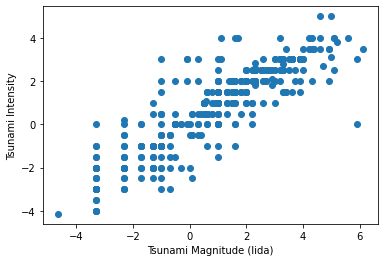

In [54]:
plt.scatter(tsunamis['Tsunami Magnitude (Iida)'], tsunamis['Tsunami Intensity'])
plt.ylabel('Tsunami Intensity')
plt.xlabel('Tsunami Magnitude (Iida)')


In [55]:
temp = tsunamis.dropna(subset=['Tsunami Magnitude (Iida)','Tsunami Intensity'])


In [56]:

x=temp[['Tsunami Magnitude (Iida)']]
y=temp['Tsunami Intensity']

In [57]:
#split the data in order to test it (in this case train it in 60% and test it on 40%):

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=True)


In [58]:
X_train

,Tsunami Magnitude (Iida)
1178,0.5
1462,-2.3
1766,0.8
773,1.0
334,1.0
...,...
1685,1.6
1236,-0.5
1840,-2.3
742,1.5


In [59]:
pd.concat([X_train,y_train],axis=1)


,Tsunami Magnitude (Iida),Tsunami Intensity
1178,0.5,1.0
1462,-2.3,-2.0
1766,0.8,0.5
773,1.0,1.5
334,1.0,1.0
...,...,...
1685,1.6,1.5
1236,-0.5,-1.5
1840,-2.3,-2.0
742,1.5,1.0


In [60]:
pd.concat([X_test,y_test],axis=1)


,Tsunami Magnitude (Iida),Tsunami Intensity
1489,-2.3,-1.0
12,0.5,1.0
1579,-1.3,0.5
1414,2.0,2.5
1363,-1.0,-1.0
...,...,...
1598,2.2,2.0
161,1.0,1.0
192,1.0,0.0
362,1.8,1.5


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [62]:
print('alpha is',lr.intercept_)
print('beta is', lr.coef_)


alpha is 0.20261027571810158
beta is [0.75773862]


In [63]:
lr.predict(X_test)


array([-1.54018855,  0.58147958, -0.78244993,  1.71808751, -0.55512834,
        2.47582613, -0.32780676,  2.70314771,  0.88457503,  1.71808751,
        4.67326812,  2.62737385,  0.58147958, -0.32780676,  0.42993186,
       -0.55512834, -0.78244993,  0.96034889,  0.12683641, -2.29792716,
       -2.29792716,  0.96034889, -2.29792716, -0.17625903,  2.09695682,
        1.86963523,  1.56653979, -1.54018855, -0.17625903, -2.29792716,
        2.47582613,  1.3392182 , -2.29792716, -2.29792716, -0.55512834,
       -1.08554537,  3.38511247,  1.71808751,  3.46088633,  1.3392182 ,
        0.65725345,  0.96034889,  0.96034889,  2.09695682, -2.29792716,
        2.9304693 , -0.17625903,  1.71808751,  3.38511247, -0.17625903,
       -1.54018855, -2.29792716, -2.29792716,  0.96034889,  2.40005227,
        1.03612276, -0.78244993, -2.29792716,  1.71808751,  1.41499206,
        0.96034889,  1.18767048,  0.96034889,  0.80880117,  0.12683641,
        2.77892158, -0.02471131,  0.42993186,  1.71808751,  0.65

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))


0.8804709103466859

C:\Users\imypo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imypo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imypo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tsunami Magnitude (Iida)', ylabel='Tsunami Intensity'>

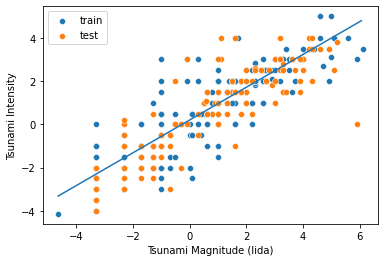

In [67]:
import numpy as np

x_range = np.arange(start=temp['Tsunami Magnitude (Iida)'].min(),stop=temp['Tsunami Magnitude (Iida)'].max(),step=0.1)
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.scatterplot(X_train['Tsunami Magnitude (Iida)'], y_train, label='train')
sns.scatterplot(X_test['Tsunami Magnitude (Iida)'], y_test, label='test')
sns.lineplot(x_range,y_hat)
# plt.plot(y_hat, color='r')
# plt.legend()

## References

Kaggle: https://www.kaggle.com/ramjasmaurya/historical-data-of-tsunamis18002021

